In [1]:
from commons import *

In [2]:
dfMetaRuntimes = pd.read_csv("data/rawruntimes/runtimes_metalearners_parametrized.csv", delimiter=";")
dfMetaRuntimesClean = dfMetaRuntimes[dfMetaRuntimes["exception"].isnull()]
dfMetaRuntimesClean = dfMetaRuntimesClean.merge(pd.read_csv("data/datasets.csv"), on="openmlid")
dfMetaRuntimesClean["applicationsize"] = dfMetaRuntimesClean["numinstances"] - dfMetaRuntimesClean["trainpoints"]
dfMetaRuntimesClean

,experiment_id,openmlid,trainpoints,seed,algorithm,algorithmoptions,baselearner,fittime,applicationtime,exception,name,numinstances,numattributes,numattributesafterbinarization,applicationsize
0,1,3,1000,0,adaboostm1,-P 70 -I 50,weka.classifiers.bayes.BayesNet,2.0,0.0,NaN,Kr-vs-kp,3196,36,40,2196
1,2,3,1000,1,adaboostm1,-P 70 -I 50,weka.classifiers.bayes.BayesNet,1.0,1.0,NaN,Kr-vs-kp,3196,36,40,2196
2,3,3,1000,0,adaboostm1,-P 70 -I 50,weka.classifiers.trees.DecisionStump,1.0,1.0,NaN,Kr-vs-kp,3196,36,40,2196
3,4,3,1000,0,adaboostm1,-P 95 -I 20,weka.classifiers.bayes.BayesNet,2.0,0.0,NaN,Kr-vs-kp,3196,36,40,2196
4,8,3,1000,1,adaboostm1,-P 70 -I 50,weka.classifiers.trees.DecisionStump,1.0,0.0,NaN,Kr-vs-kp,3196,36,40,2196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43900,14540,24,1000,0,randomsubspace,-P 80 -I 5,weka.classifiers.functions.SMO,1.0,1.0,NaN,NaN,8124,22,121,7124
43901,14550,24,1000,1,randomsubspace,-P 80 -I 5,weka.classifiers.functions.SMO,1.0,0.0,NaN,NaN,8124,22,121,7124
43902,14551,24,1000,1,randomsubspace,-P 90 -I 5,weka.classifiers.trees.REPTree,1.0,0.0,NaN,NaN,8124,22,121,7124
43903,14552,24,1000,0,randomsubspace,-P 90 -I 5,weka.classifiers.functions.SMO,1.0,0.0,NaN,NaN,8124,22,121,7124


In [3]:
metalearners = list(pd.unique(dfMetaRuntimes["algorithm"]))
metalearners.remove("lwl")
baselearners = classifiers
datasets = pd.unique(dfMetaRuntimes["openmlid"])

In [4]:
algoshortcuts = {
    'adaboostm1': "ab",
    'bagging': "bag",
    'logitboost': "lb",
    'lwl': "lwl",
    'randomcommittee': "rc",
    'randomsubspace': "rss"
}

# 0. Merge and Aggregate Informations of sub-learners into one Archive

In [5]:
dfAddInfo = pd.read_csv("data/rawruntimes/additional_information_metalearners_parametrized.csv", delimiter=";")
dfAddInfo["traintime_training"] = np.maximum(0, dfAddInfo["lastBuildClassifierTimestamp_training"] - dfAddInfo["firstBuildClassifierTimestamp_training"])
dfAddInfo["disttime_training"] = np.maximum(0, dfAddInfo["lastDistributionTimestamp_training"] - dfAddInfo["firstDistributionTimestamp_training"])
dfAddInfo["classifytime_training"] = np.maximum(0, dfAddInfo["lastClassifyInstanceTimestamp_training"] - dfAddInfo["firstClassifyInstanceTimestamp_training"])
dfAddInfo["traintime_prediction"] = np.maximum(0, dfAddInfo["lastBuildClassifierTimestamp_prediction"] - dfAddInfo["firstBuildClassifierTimestamp_prediction"])
dfAddInfo["disttime_prediction"] = np.maximum(0, dfAddInfo["lastDistributionTimestamp_prediction"] - dfAddInfo["firstDistributionTimestamp_prediction"])
dfAddInfo["classifytime_prediction"] = np.maximum(0, dfAddInfo["lastClassifyInstanceTimestamp_prediction"] - dfAddInfo["firstClassifyInstanceTimestamp_prediction"])

In [6]:
dfAddInfo

,info_id,experiment_id,openmlid,datapoints,seed,baselearner,hashCodeOfBaselearner,numberOfDistributionCalls_training,numberOfDistributionSCalls_training,numberOfClassifyInstanceCalls_training,...,firstMetafeatureTimestamp_prediction,lastMetafeatureTimestamp_prediction,datasetMetafeatures,algorithm,traintime_training,disttime_training,classifytime_training,traintime_prediction,disttime_prediction,classifytime_prediction
0,150930,15,6,1000,0,weka.classifiers.bayes.BayesNet,278572459,1000,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=1000, n...",adaboostm1,45,33,24,0,0,1777
1,150931,15,6,1000,0,weka.classifiers.bayes.BayesNet,1537713709,1000,0,0,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=1000, n...",adaboostm1,25,28,0,0,0,0
2,150932,15,6,1000,0,weka.classifiers.bayes.BayesNet,102406256,1000,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=1000, n...",adaboostm1,26,28,21,0,0,1777
3,150933,15,6,1000,0,weka.classifiers.bayes.BayesNet,874665096,1000,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=1000, n...",adaboostm1,85,81,30,0,0,1777
4,150934,68,14,1000,0,weka.classifiers.trees.DecisionStump,1300256839,1000,0,0,...,9223372036854775807,0,"{numnumericattributes=76, numinstances=1000, n...",adaboostm1,49,9,0,0,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049441,1834137,146804,6,1000,0,weka.classifiers.trees.RandomTree,167868923,0,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=214, nu...",logitboost,1,0,27,0,0,14513
2049442,1834138,146804,6,1000,0,weka.classifiers.trees.RandomTree,449317170,0,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=372, nu...",logitboost,1,0,21,0,0,14514
2049443,1834139,146804,6,1000,0,weka.classifiers.trees.RandomTree,197430335,0,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=382, nu...",logitboost,1,0,22,0,0,14514
2049444,1834140,146804,6,1000,0,weka.classifiers.trees.RandomTree,1203645504,0,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=254, nu...",logitboost,1,0,28,0,0,14513


In [7]:
def mergeExecutionInformation(dfMetalearnerRuntimes, dfAddInfo, fileResults):
    cols = ["experiment_id", "openmlid", "fitsize", 'numattributes', 'applicationsize', "algorithm", "algorithmoptions", "baselearner", "seed", "copies", "portion", "sub_numinstances", "sub_numattributes", 'numberOfDistributionCalls_training',
       'numberOfDistributionSCalls_training',
       'numberOfClassifyInstanceCalls_training',
       'numberOfBuildClassifierCalls_training', 'numberOfDistributionCalls_prediction',
       'numberOfDistributionSCalls_prediction',
       'numberOfClassifyInstanceCalls_prediction',
       'numberOfBuildClassifierCalls_prediction', 'traintime_training', 'disttime_training',
       'classifytime_training', 'traintime_prediction', 'disttime_prediction',
       'classifytime_prediction', 'homogeneousmetafeatures', 'fittime', 'applicationtime']
    mfcols = list(ast.literal_eval(dfAddInfo["datasetMetafeatures"].values[0].replace("=", "\": \"").replace(", ", "\", \"").replace("{", "{\"").replace("}", "\"}")).keys())
            
    dfResults = pd.read_csv(fileResults) if path.exists(fileResults) else pd.DataFrame([], columns=cols)
    i = 0
                        
    groups = dfAddInfo.groupby(["algorithm", "experiment_id"])
    pbar = tqdm(total = len(groups))
    for gIndex, group in groups:
        
        match = dfResults[(dfResults["algorithm"] == gIndex[0]) & (dfResults["experiment_id"] == gIndex[1])]
        if len(match) == 0:
        
            # get meta-learner experiment for this group of additional informations
            metaRun = dfMetalearnerRuntimes.query("experiment_id == " + str(gIndex[1]) + " and algorithm == '" + gIndex[0] + "'")
            if len(metaRun) == 1:
        
        
                #traintime = group["traintime_training"]
                #if len(traintime[traintime < 10]) > 0:
                #    raise Exception("Invalid value")
                #exp_id = pd.unique(seedDF["experiment_id"])[0]

                # setup a row for the summary table
                ml = gIndex[0]
                metaRunWithOptions = explodeAlgorithmOptions(metaRun)
                if metaRunWithOptions["I"].values[0] == len(group):
                    
                    numBaselearners = len(group)

                    # get call statistics
                    dfCallCounts = group[['numberOfDistributionCalls_training', 'numberOfDistributionSCalls_training', 'numberOfClassifyInstanceCalls_training', 'numberOfBuildClassifierCalls_training', 'numberOfDistributionCalls_prediction', 'numberOfDistributionSCalls_prediction', 'numberOfClassifyInstanceCalls_prediction', 'numberOfBuildClassifierCalls_prediction']]
                    hasUnityInCalls = len(dfCallCounts.drop_duplicates()) == 1
                    if hasUnityInCalls:
                        
                        # compute data frame only of the meta features occurring in this group
                        dfMF = pd.DataFrame([], columns=mfcols)
                        metafeatureValues = [ast.literal_eval(row.replace("=", "\": \"").replace(", ", "\", \"").replace("{", "{\"").replace("}", "\"}")) for row in group["datasetMetafeatures"].values]
                        for groupItem in metafeatureValues:
                            row = []
                            for key in mfcols:
                                row.append(groupItem[key])
                            dfMF.loc[len(dfMF)] = row
                        hasUnityInFeatures = len(dfMF.drop_duplicates()) == 1


                        row = list(group[["experiment_id", "openmlid", "datapoints"]].values[0])
                        row.extend(metaRun[["numattributes", "applicationsize", "algorithm", "algorithmoptions", "baselearner", "seed"]].values[0])
                        row.append(numBaselearners)
                        row.append(metaRunWithOptions["P"].values[0] if "P" in metaRunWithOptions.columns else "")
                        row.extend(np.nanmean(dfMF[["numinstances", "numattributes"]].astype(int).values, axis=0).astype(int)) # add means of the sub-dataset metafeatures
                        row.extend(dfCallCounts.drop_duplicates().values[0])
                        for key in ['traintime_training', 'disttime_training', 'classifytime_training', 'traintime_prediction', 'disttime_prediction', 'classifytime_prediction']:
                            row.append(np.sum(group[key]) / 1000)
                        row.append(hasUnityInFeatures)
                        row.extend(metaRun[["fittime", "applicationtime"]].values[0])
                        
                        dfResults.loc[len(dfResults)] = row
                        i += 1
                        if i == 100:
                            dfResults.to_csv(fileResults, index=False)
                            i = 0
                    else:
                        print("No unity in call stats. Found " + str(len(dfCallCounts.drop_duplicates())) + " entries.")
            else:
                print("WARNING: Unexpected length " + str(len(metaRun)) + " for experiment_id " + str(gIndex[1]) + " of algorithm " + gIndex[0])

        pbar.update(1)
    if i > 0:
        dfResults.to_csv(fileResults, index=False)
        i = 0
    pbar.close()
    return dfResults

mergeExecutionInformation(dfMetaRuntimesClean, dfAddInfo, "data/workdata/metalearner.csv")

No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 2 entries.
No unity in call stats. Found 3 entries.
No unity in call stats. Found 2 entries.
No unity in call

,experiment_id,openmlid,fitsize,numattributes,applicationsize,algorithm,algorithmoptions,baselearner,seed,copies,...,numberOfBuildClassifierCalls_prediction,traintime_training,disttime_training,classifytime_training,traintime_prediction,disttime_prediction,classifytime_prediction,homogeneousmetafeatures,fittime,applicationtime
0,4,3,1000,36,2196,adaboostm1,-P 95 -I 20,weka.classifiers.bayes.BayesNet,0,20,...,0,0.119,0.160,0.107,0.0,0.000,6.724,False,2.0,0.0
1,13,3,1000,36,2196,adaboostm1,-P 95 -I 20,weka.classifiers.trees.DecisionStump,0,20,...,0,0.077,0.094,0.042,0.0,0.000,2.700,False,2.0,0.0
2,14,3,1000,36,2196,adaboostm1,-P 95 -I 20,weka.classifiers.bayes.BayesNet,1,20,...,0,0.131,0.161,0.105,0.0,0.000,6.520,False,2.0,0.0
3,18,12,1000,216,1000,adaboostm1,-P 70 -I 50,weka.classifiers.bayes.BayesNet,0,50,...,0,4.493,6.346,6.084,0.0,0.000,1057.202,False,18.0,21.0
4,32,3,1000,36,2196,adaboostm1,-P 95 -I 20,weka.classifiers.trees.DecisionStump,1,20,...,0,0.084,0.094,0.123,0.0,0.000,2.700,False,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17614,14550,24,1000,22,7124,randomsubspace,-P 80 -I 5,weka.classifiers.functions.SMO,1,5,...,0,0.289,0.000,0.000,0.0,1.415,0.000,True,1.0,0.0
17615,14551,24,1000,22,7124,randomsubspace,-P 90 -I 5,weka.classifiers.trees.REPTree,1,5,...,0,0.008,0.000,0.000,0.0,0.920,0.000,True,1.0,0.0
17616,14552,24,1000,22,7124,randomsubspace,-P 90 -I 5,weka.classifiers.functions.SMO,0,5,...,0,0.345,0.000,0.000,0.0,1.455,0.000,True,1.0,0.0
17617,14554,23,1000,9,473,randomsubspace,-P 90 -I 5,weka.classifiers.functions.SMO,1,5,...,0,0.788,0.000,0.000,0.0,0.035,0.000,True,1.0,0.0


# 1. Verify Hypothesis of Negligible Overhead

In [8]:
dfResults = pd.read_csv("data/workdata/metalearner.csv")
dfResults["sub_inductiontime"] = dfResults['traintime_training'] + dfResults['disttime_training'] + dfResults['classifytime_training']
dfResults["sub_inductiontimepercopy"] = dfResults["sub_inductiontime"] / dfResults["copies"]
dfResults["sub_inferencetime"] = (dfResults['traintime_prediction'] + dfResults['disttime_prediction'] + dfResults['classifytime_prediction']) / dfResults['copies']
dfResults["sub_inferencetimepercopy"] = dfResults["sub_inferencetime"] / dfResults["copies"]
dfResults["sub_inductions_training"] = dfResults["numberOfBuildClassifierCalls_training"]
dfResults["sub_inferences_training"] = dfResults["numberOfDistributionCalls_training"] + dfResults["numberOfClassifyInstanceCalls_training"]
dfResults["sub_inductions_prediction"] = dfResults["numberOfBuildClassifierCalls_prediction"]
dfResults["sub_inferences_prediction"] = dfResults["numberOfDistributionCalls_prediction"] + dfResults["numberOfClassifyInstanceCalls_prediction"]

In [9]:
dfResults.columns

Index(['experiment_id', 'openmlid', 'fitsize', 'numattributes',
       'applicationsize', 'algorithm', 'algorithmoptions', 'baselearner',
       'seed', 'copies', 'portion', 'sub_numinstances', 'sub_numattributes',
       'numberOfDistributionCalls_training',
       'numberOfDistributionSCalls_training',
       'numberOfClassifyInstanceCalls_training',
       'numberOfBuildClassifierCalls_training',
       'numberOfDistributionCalls_prediction',
       'numberOfDistributionSCalls_prediction',
       'numberOfClassifyInstanceCalls_prediction',
       'numberOfBuildClassifierCalls_prediction', 'traintime_training',
       'disttime_training', 'classifytime_training', 'traintime_prediction',
       'disttime_prediction', 'classifytime_prediction',
       'homogeneousmetafeatures', 'fittime', 'applicationtime',
       'sub_inductiontime', 'sub_inductiontimepercopy', 'sub_inferencetime',
       'sub_inferencetimepercopy', 'sub_inductions_training',
       'sub_inferences_training', 'sub_ind

In [10]:
dfResults[["experiment_id", "algorithm", "fitsize", "numattributes", "algorithmoptions", "numberOfBuildClassifierCalls_training", "numberOfClassifyInstanceCalls_prediction"]]

,experiment_id,algorithm,fitsize,numattributes,algorithmoptions,numberOfBuildClassifierCalls_training,numberOfClassifyInstanceCalls_prediction
0,4,adaboostm1,1000,36,-P 95 -I 20,1,2196
1,13,adaboostm1,1000,36,-P 95 -I 20,1,2196
2,14,adaboostm1,1000,36,-P 95 -I 20,1,2196
3,18,adaboostm1,1000,216,-P 70 -I 50,1,1000
4,32,adaboostm1,1000,36,-P 95 -I 20,1,2196
...,...,...,...,...,...,...,...
17614,14550,randomsubspace,1000,22,-P 80 -I 5,1,0
17615,14551,randomsubspace,1000,22,-P 90 -I 5,1,0
17616,14552,randomsubspace,1000,22,-P 90 -I 5,1,0
17617,14554,randomsubspace,1000,9,-P 90 -I 5,1,0


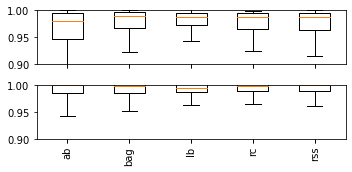

In [11]:
boxesInduction = []
boxesInference = []
legend = []
for ml in metalearners:
    dfAlgo = dfResults[dfResults["algorithm"] == ml]
    totInductionTime = dfAlgo["fittime"]
    totInferenceTime = dfAlgo["applicationtime"]
    subInductionTime = dfAlgo["sub_inductiontime"]
    subInferenceTime = dfAlgo["sub_inferencetime"]
    inductionIndex = (totInductionTime >= 10) & (totInductionTime + 5 >= subInductionTime)
    inferenceIndex = (totInferenceTime >= 10) & (totInferenceTime + 5 >= subInferenceTime)
    
    diffInduction = subInductionTime[inductionIndex] / totInductionTime[inductionIndex]
    diffInference = subInferenceTime[inferenceIndex] / totInferenceTime[inferenceIndex]
    
    boxesInduction.append(diffInduction)
    boxesInference.append(diffInference)
    legend.append(ml)

    
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5, 2.5))
a = ax[0]
a.boxplot(boxesInduction, 0, "")
a.set_ylim([0.9, 1])
a = ax[1]
a.boxplot(boxesInference, 0, "")
a.set_xticklabels([algoshortcuts[a] for a in legend], rotation=90)
a.set_ylim([0.9, 1])
fig.tight_layout()
fig.savefig("plots/metalearners-ratio.pdf")
plt.show()

# 2. Check Prediction Quality of the "Formula"

In [12]:
dfResults.columns

Index(['experiment_id', 'openmlid', 'fitsize', 'numattributes',
       'applicationsize', 'algorithm', 'algorithmoptions', 'baselearner',
       'seed', 'copies', 'portion', 'sub_numinstances', 'sub_numattributes',
       'numberOfDistributionCalls_training',
       'numberOfDistributionSCalls_training',
       'numberOfClassifyInstanceCalls_training',
       'numberOfBuildClassifierCalls_training',
       'numberOfDistributionCalls_prediction',
       'numberOfDistributionSCalls_prediction',
       'numberOfClassifyInstanceCalls_prediction',
       'numberOfBuildClassifierCalls_prediction', 'traintime_training',
       'disttime_training', 'classifytime_training', 'traintime_prediction',
       'disttime_prediction', 'classifytime_prediction',
       'homogeneousmetafeatures', 'fittime', 'applicationtime',
       'sub_inductiontime', 'sub_inductiontimepercopy', 'sub_inferencetime',
       'sub_inferencetimepercopy', 'sub_inductions_training',
       'sub_inferences_training', 'sub_ind

In [13]:
dfResults["formulatime"] = dfResults["copies"] * (dfResults["sub_inductiontimepercopy"] + (dfResults["sub_inferences_training"] + dfResults["sub_inferences_prediction"]) * dfResults["sub_inferencetimepercopy"] / dfResults["sub_numinstances"])

3401
4639
1446
1005
7128


/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


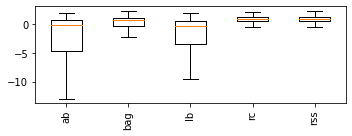

In [14]:
boxesPredictionAbs = []
boxesPredictionRel = []
for ml in metalearners:
    dfAlgo = dfResults[dfResults["algorithm"] == ml]
    valsAbs = (dfAlgo["fittime"] + dfAlgo["applicationtime"] - dfAlgo["formulatime"]).values
    valsRel = np.abs(((dfAlgo["formulatime"] - (dfAlgo["fittime"] + dfAlgo["applicationtime"])) / (dfAlgo["fittime"] + dfAlgo["applicationtime"])).values)
    boxesPredictionAbs.append(valsAbs)
    boxesPredictionRel.append(valsRel)
    print(len(valsAbs))
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
a = ax
a.boxplot(boxesPredictionAbs, 0, "")
a.set_xticks(np.arange(len(metalearners)) + 1)
a.set_xticklabels([algoshortcuts[a] for a in metalearners], rotation=90)
fig.tight_layout()
fig.savefig("plots/metalearnerperformance.pdf")
fig.show()

### Combined Plot

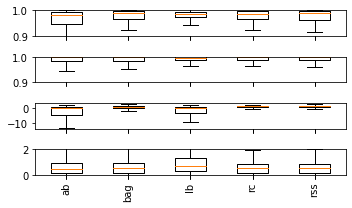

In [15]:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(5, 3))
a = ax[0]
a.boxplot(boxesInduction, 0, "")
a.set_ylim([0.9, 1])
a = ax[1]
a.boxplot(boxesInference, 0, "")
a.set_ylim([0.9, 1])
a = ax[2]
a.boxplot(boxesPredictionAbs, 0, "")
a = ax[3]
a.boxplot(boxesPredictionRel, 0, "")
a.set_ylim([0, 2])
a.set_xticklabels([algoshortcuts[a] for a in legend], rotation=90)
fig.tight_layout()
fig.savefig("plots/metalearners-combined.pdf")
plt.show()